# The MNIST Dataset
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

[MNIST Website](http://yann.lecun.com/exdb/mnist/)

[Convolutional Network Demo from 1993](https://youtu.be/FwFduRA_L6Q)

The dataset is included in the keras library. We will import the dataset, and apply different machine learning techniques to it.

# Loading and Preparing the Data

In [2]:
# Loading the MNIST dataset from Keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
# printing the shapes of the arrays
def printshapes(*arrays):
    [print(a.shape) for a in arrays]

printshapes(train_images, train_labels, test_images, test_labels)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


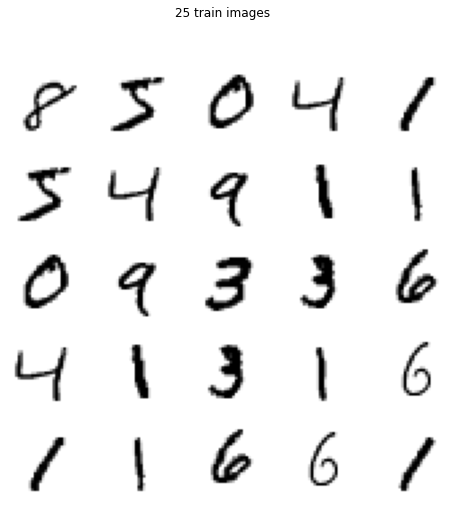

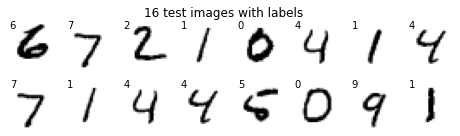

In [5]:
# create a function to plot a subset of the data along with labels, and predicted values (if available)

from matplotlib import pyplot as plt
import numpy as np

def plot_images(dataset, row=5, col=5, size=(8, 8), labels=None, predicted=None, title=None):
    fig, axes = plt.subplots(nrows=row, ncols=col, figsize=size)
    if title: fig.suptitle(title)
    for r in range(row):
        for c in range(col):
            index = (r+1)*(c+1)-2
            digit = dataset[index]
            # generate the plot for one image
            axes[r, c].imshow(digit, cmap=plt.cm.binary)
            axes[r, c].axis('off')
            # print the labels
            try: axes[r, c].text(1, 3, str(labels[index]))
            except: pass
            # print the predictions
            try: 
                if predicted[index] == labels[index]:
                    axes[r, c].text(1, 13, str(predicted[index]))
                else:
                    axes[r, c].text(1, 13, str(predicted[index]), color='r')
            except: pass
    return plt.show()

plot_images(train_images, title="25 train images")
plot_images(test_images, 2, 8, size=(8, 2), labels=test_labels, title="16 test images with labels")

In [6]:
# preparing the image data - converting the images to one dimentional arrays
X_train = train_images.reshape((60000, 28*28)).astype('float32') / 255
X_test = test_images.reshape((10000, 28*28)).astype('float32') / 255

# labels as numbers (for sklearn)
y_train = train_labels
y_test  = test_labels

# Fitting a Linear Regression Model

In [8]:
from sklearn.linear_model import LinearRegression
%time linear = LinearRegression().fit(X_train, y_train)
print(linear)

Wall time: 1.7 s
LinearRegression()


In [9]:
print("Linear Model")
print("acc. on training set:", linear.score(X_train, y_train))
print("acc. on testing set:", linear.score(X_test, y_test))

Linear Model
acc. on training set: 0.6161201013030994
acc. on testing set: 0.6242350062345428


In [10]:
predicted_linear = linear.predict(X_test)
print(predicted_linear)
predicted_linear = [int(n) for n in predicted_linear]
print(predicted_linear[0:10])

[6.3243427 2.3116388 1.6168845 ... 7.900923  5.5029354 5.762047 ]
[6, 2, 1, 0, 4, 1, 7, 5, 3, 8]


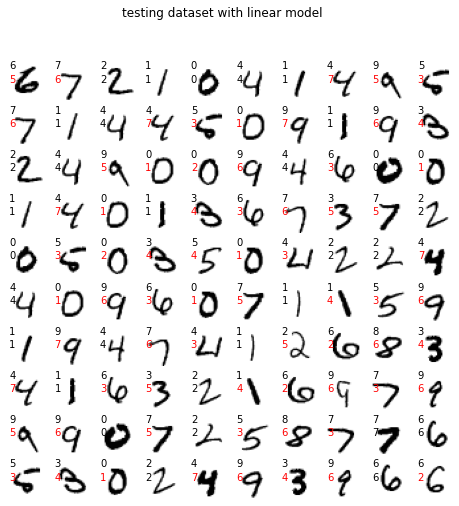

In [11]:
plot_images(test_images, 10, 10, labels=test_labels, predicted=predicted_linear, title="testing dataset with linear model")

# Fitting a Logistic Regression Model

In [12]:
from sklearn.linear_model import LogisticRegression

%time logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
print(logistic)

Wall time: 14.9 s
LogisticRegression(multi_class='multinomial')


In [13]:
print("Logistic Model")
print("acc. on training set:", logistic.score(X_train, y_train))
print("acc. on testing set:", logistic.score(X_test, y_test))

Logistic Model
acc. on training set: 0.9346166666666667
acc. on testing set: 0.9256


In [14]:
predicted_logistic = logistic.predict(X_test)
print(predicted_logistic)
predicted_logistic = [int(n) for n in predicted_logistic]
print(predicted_logistic[0:10])

[7 2 1 ... 4 5 6]
[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]


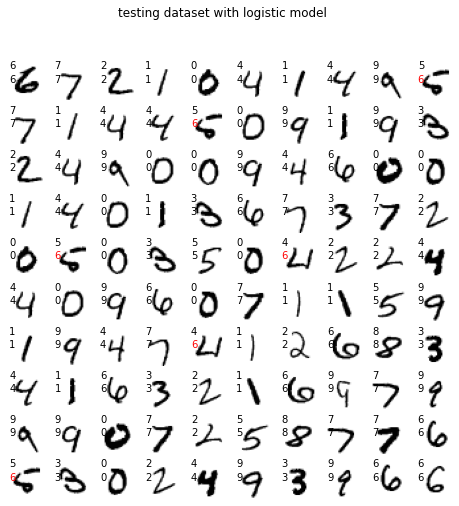

In [15]:
plot_images(test_images, 10, 10, labels=test_labels, predicted=predicted_logistic, title="testing dataset with logistic model")

# Fitting a Neural Network

In [16]:
# preparing the labels as arrays (for keras)
from keras.utils import to_categorical
Y_train = to_categorical(train_labels)
Y_test  = to_categorical(test_labels)

# the network architecture
from keras import models, layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
# compile the network
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# train the network
%time network.fit(X_train, Y_train, epochs=5, batch_size=128)
print(network)

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 0.4442 - accuracy: 0.8713
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1089 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0683 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0497 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0358 - accuracy: 0.9895
Wall time: 10.9 s


In [18]:
train_loss, train_acc = network.evaluate(X_train, Y_train)
test_loss, test_acc = network.evaluate(X_test, Y_test)

print("Neural Network")
print("acc. on training set:", train_acc)
print("acc. on testing set:", test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0667 - accuracy: 0.9803
Neural Network
acc. on training set: 0.9928500056266785
acc. on testing set: 0.9803000092506409


In [19]:
predicted_nn = network.predict(X_test)
predicted_nn = [np.argmax(arr) for arr in predicted_nn]
print(predicted_nn[0:10])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


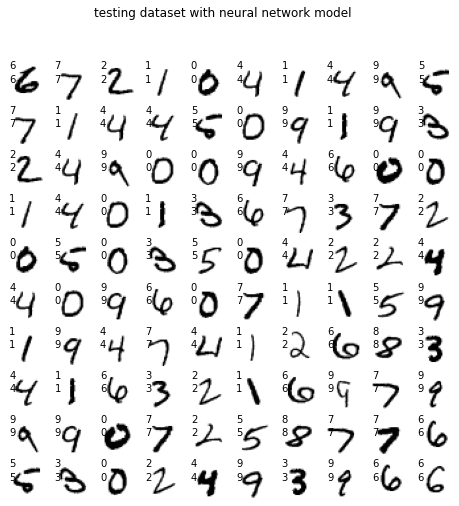

In [20]:
plot_images(test_images, 10, 10, labels=test_labels, predicted=predicted_nn, title="testing dataset with neural network model")